In [2]:
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669758 sha256=6f43adcfd4fa16fe17ca0a356d8e321373d616d2f5d82ae3071df45521004f0c
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely


In [3]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 30.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [4]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [6]:
import pandas as pd
import plotnine as p9
import random
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


def k_means(df, k):
  pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
  centers = random.sample(pts, k)
  old_cluster_ids, cluster_ids = None, [] 
  while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
      min_cluster = -1
      min_dist = float('inf')
      for i, center in enumerate(centers):
        dist = haversine(pt[0], pt[1], center[0], center[1])
        if dist < min_dist:
          min_cluster = i
          min_dist = dist
      cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
      for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]

  df = df[['lat','lng','cluster']]

  fig = plt.figure(figsize = (15,20))
  ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

  for i in range(k):
      lats = df[df["cluster"] == i]["lat"].tolist()
      lngs = df[df["cluster"] == i]["lng"].tolist()
      ax.plot(lngs, lats, "o", markersize = 2, transform=ccrs.PlateCarree())

  ax.coastlines()
  ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
  plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip


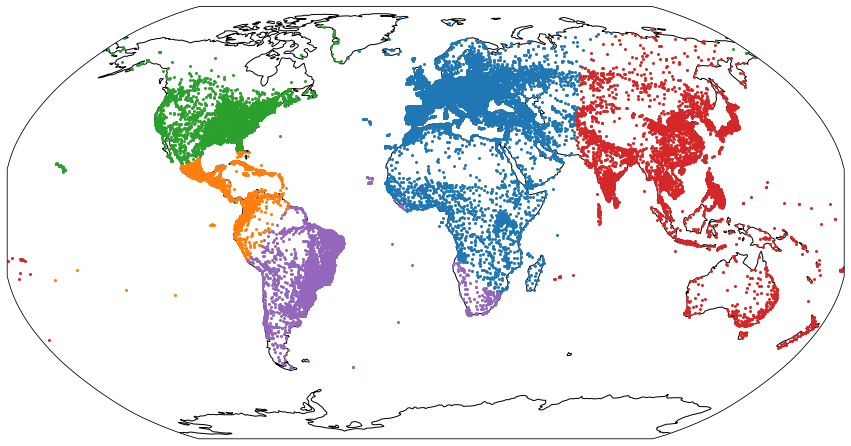

In [7]:
df = pd.read_csv("worldcities.csv")
k_means(df,5)

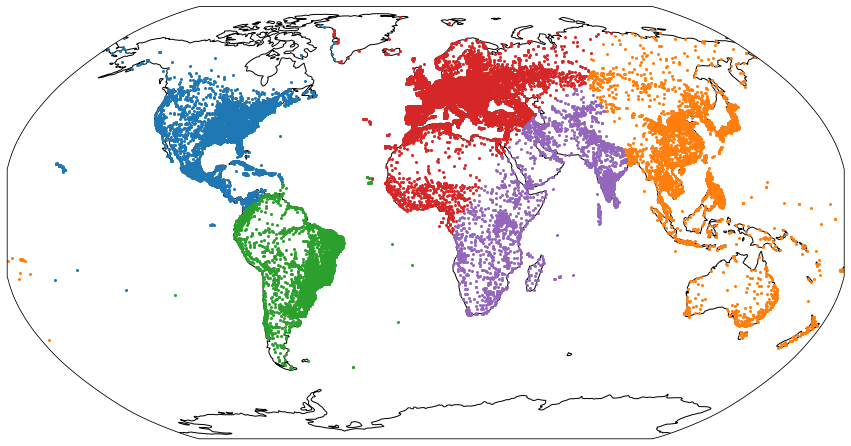

In [12]:
k_means(df,5)

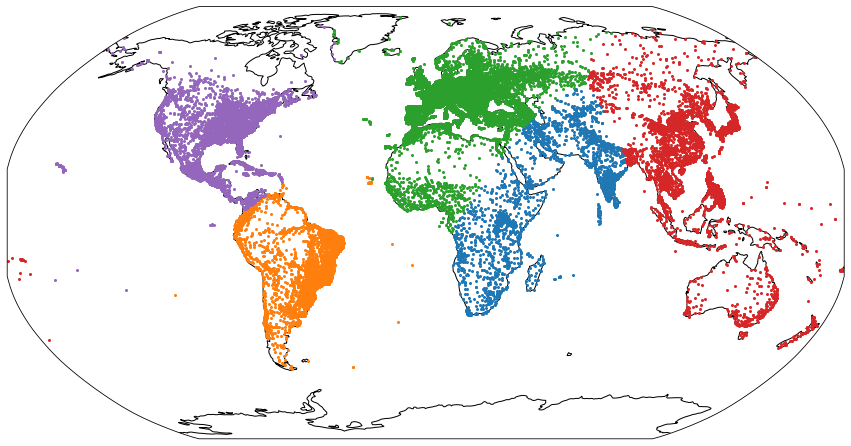

In [13]:
k_means(df,5)

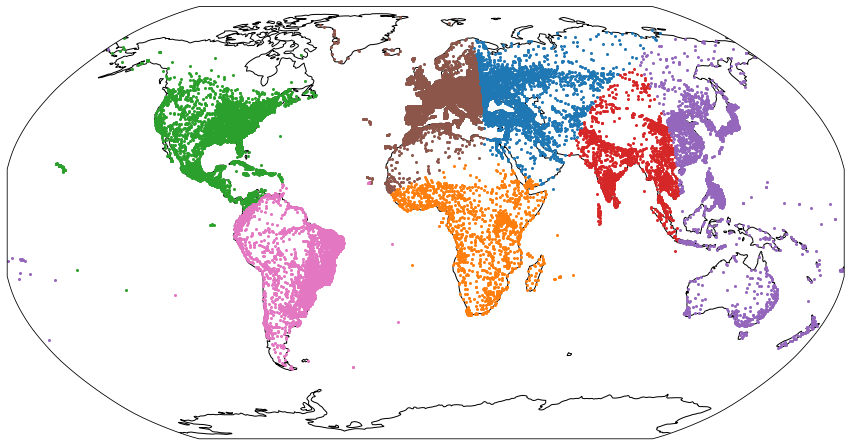

In [10]:
k_means(df,7)

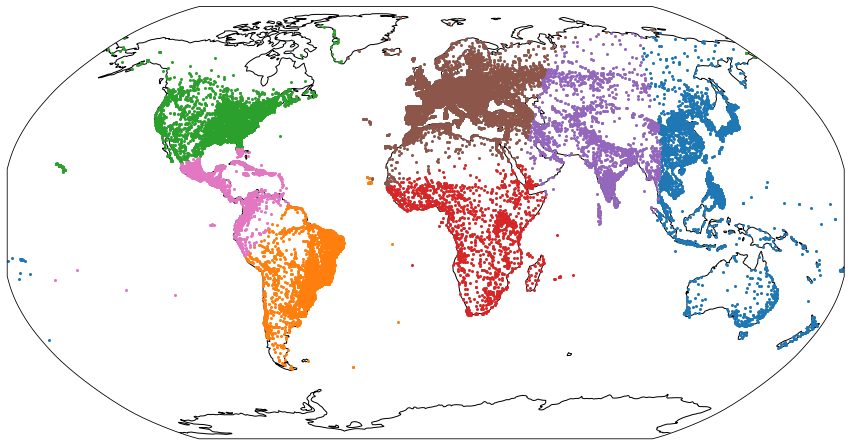

In [14]:
k_means(df,7)

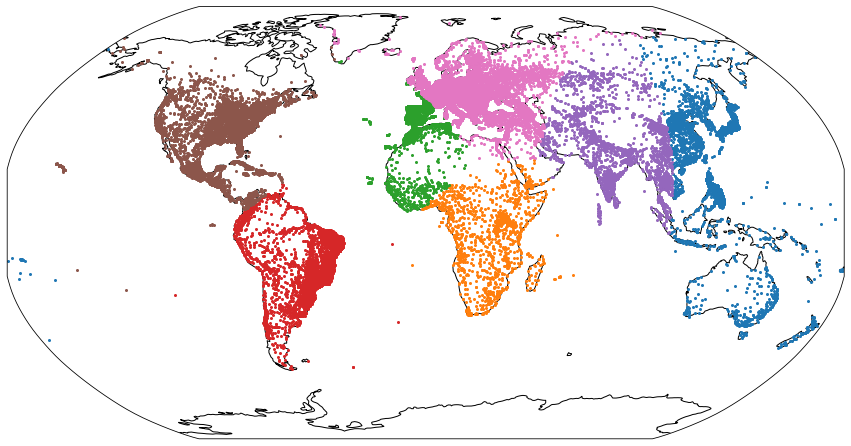

In [15]:
k_means(df,7)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


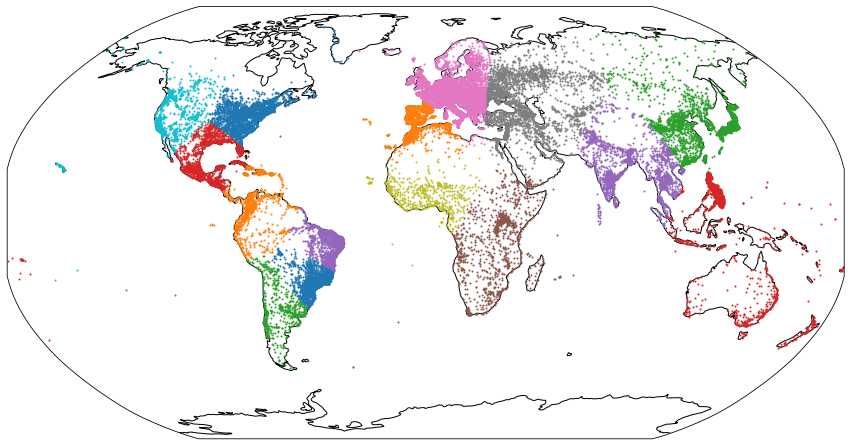

In [59]:
k_means(df,15)

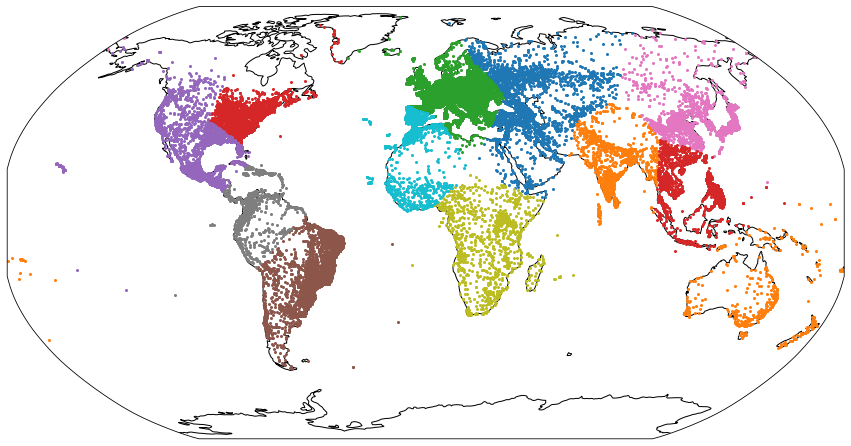

In [17]:
k_means(df,15)

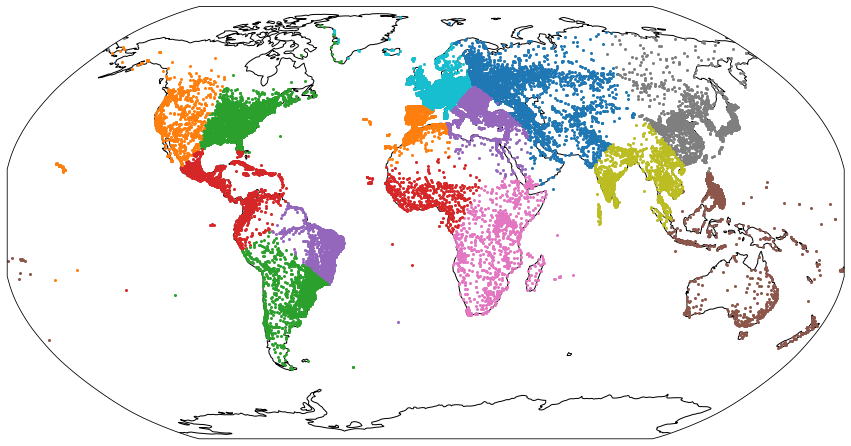

In [18]:
k_means(df,15)